In [3]:
from __future__ import division
from utils import *
from functions import *
from cycler import cycler
import matplotlib as mpl
%matplotlib inline

%load_ext autoreload
%autoreload 2

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [5]:
# Instantiate classes
cortex = Cortex()
trn = TRN()
gr = GRAPH()

# styling
gammaColor = '#00cc99'

def xax(gamma, duration):
    x= np.arange(0,(duration-1)/1000,(duration)/1000/len(gamma) )
    return x

In [230]:
# #-------------------------------
# # PARAMS SEARCH
# #-------------------------------
N = 100
G = 10
d1 = 10
d2 = 6000
d3 = 10
before = d1
after = d2+d3
sigma = 60
WII = 3600 #2800
LTP = 0.01
LTD = 0.002
S = 100
model = "TRN"
glob = 0


FACT = 1
ratio = 13
r=0
it = 8
binsize=1000
coeff=1
ratio = 15
LTD  = 1e-9*4.7e-6 * FACT * N
LTP = ratio * LTD


# for S in np.arange(50,400,50):
#     Parallel(n_jobs=8)(delayed(cortex.runSimulation)(N,0, G, S, d1, d2, d3, before, after, sigma, \
# WII, LTP, LTD) for G in np.linspace(1,9,"8))
cortex.runSimulation(N=N,i=0, g=G, S=S, d1=d1, d2=d2, d3=d3, before=before, after=after,\
                     s=sigma, WII=WII, LTP=LTP, LTD=LTD, model=model, r=r, glob=glob)

./cortex -N 100 -ext _0.txt -d1 10 -d2 6000 -d3 10 -before 10 -after 6010 -S 100 -G 10 -s 60 -WII 3600 -LTP 7.05e-12 -LTD 4.7e-13 -model TRN -r 0 -global 0


In [231]:
spikes_x, spikes_y, spikes_x_tc, spikes_y_tc, \
                   gamma, correlation, ssp1, stimulation, p, q, LowSp, vm = cortex.readSimulation(N=N, r=r, i=0, g=G, S=S, d1=d1, d2=d2, d3=d3, \
                                                            WII=WII, LTP=LTP, LTD=LTD, model=model, glob=glob )
GAP2D = cortex.readMatrix(N=N, r=r, i=0, g=G, S=S, d1=d1, d2=d2, d3=d3, \
                                                            WII=WII, LTP=LTP, LTD=LTD, model=model, glob=glob, type="GAP" )
GAP2D0 = cortex.readMatrix(N=N, r=r, i=0, g=G, S=S, d1=d1, d2=d2, d3=d3, \
                                                            WII=WII, LTP=LTP, LTD=LTD, model=model, glob=glob, type="GAP0" )
WII2D = cortex.readMatrix(N=N, r=r, i=0, g=G, S=S, d1=d1, d2=d2, d3=d3, \
                                                            WII=WII, LTP=LTP, LTD=LTD, model=model, glob=glob, type='WII' )
titlestr = r'$N=%d$  $\frac{\alpha_{LTP}}{\alpha_{LTD}}=%d$  $g_0=%.1f$  $\nu=%d$' %(N, ratio, G, sigma)

# plt.plot(xax(gamma,d1+d2+d3), gamma, color='c')
# plt.title(titlestr)

In [232]:
# plt.plot(vm)

In [233]:
gr.plotRasterGPU(spikes_x[-50000:],spikes_y[-50000:], "")
# gr.plotRaster(spikes_x[-50000:],spikes_y[-50000:], "")

# gr.plotRasterGPU(spikes_x[:],spikes_y[:], "test_%s.html"%(str(G)), saveImg=0)

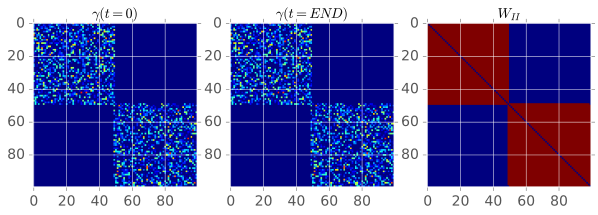

In [226]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(131)
# plt.imshow(np.array(GAP2D)[100:150,1:20], interpolation='nearest')
ax1.imshow(np.array(GAP2D), interpolation='nearest')
ax1.set_title(r'$\gamma(t = 0)$')
# plt.colorbar()
# plt.figure(figsize=(10,10))
ax2 = plt.subplot(132)
ax2.imshow(np.array(GAP2D0), interpolation='nearest')
ax2.set_title(r'$\gamma(t = END)$')
# plt.colorbar()
# plt.figure(figsize=(10,10))
ax3 = plt.subplot(133)
ax3.imshow(np.array(WII2D), interpolation='nearest')
ax3.set_title(r'$W_{II}$')
# plt.colorbar()

In [164]:
# plt.figure(figsize=(10,5))
# n,bins,patchs = plt.hist(spikes_x, bins=1000, color='c', facecolor='c', edgecolor='none')
# plt.title('LFP')